## <center> Análise da base de Alimentos Regularizados e Situação do Registro </center>

#### <center> 📈 Análise de Dados 📉

#### Importações

In [6]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import tree

#### Consumindo a base vinda de um arquivo pickle

In [7]:
base = pickle.load(open('base_consumo', 'rb'))

display(base)

,Country,PopulationGroup,ConsumptionCategory,ConsumptionSpecificity,GramsPerDays,Days,GramsOneDay
0,Austria,Adults,Alcoholic beverages,Alcoholic beverages,2123,7,303.3
1,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
2,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
3,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
4,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
...,...,...,...,...,...,...,...
307079,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307080,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307081,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307082,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5


In [8]:
print(base['ConsumptionCategory'].unique())

['Alcoholic beverages'
 'Animal and vegetable fats and oils and primary derivatives thereof'
 'Coffee, cocoa, tea and infusions' 'Composite dishes'
 'Eggs and egg products'
 'Fish, seafood, amphibians, reptiles and invertebrates'
 'Fruit and fruit products'
 'Fruit and vegetable juices and nectars (including concentrates)'
 'Grains and grain-based products' 'Legumes, nuts, oilseeds and spices'
 'Major isolated ingredients, additives, flavours, baking and processing aids'
 'Meat and meat products' 'Milk and dairy products' 'Other ingredients'
 'Products for non-standard diets, food imitates and food supplements'
 'Seasoning, sauces and condiments'
 'Starchy roots or tubers and products thereof, sugar plants'
 'Sugar and similar, confectionery and water-based sweet desserts'
 'Vegetables and vegetable products' 'Water and water-based beverages'
 'Food products for young population']


In [9]:
base = base[base['PopulationGroup'].isin(['Pregnant women', 'Lactating women'])].dropna()
display(base)

,Country,PopulationGroup,ConsumptionCategory,ConsumptionSpecificity,GramsPerDays,Days,GramsOneDay
16185,Estonia,Lactating women,Alcoholic beverages,Beer and beer-like beverage,763,7,109.0
16186,Estonia,Lactating women,Alcoholic beverages,Beer and beer-like beverage,763,7,109.0
16187,Estonia,Lactating women,Alcoholic beverages,Beer and beer-like beverage,763,7,109.0
16188,Estonia,Lactating women,Alcoholic beverages,Beer and beer-like beverage,763,7,109.0
16189,Estonia,Lactating women,Alcoholic beverages,Unsweetened spirits and liqueurs,763,7,109.0
...,...,...,...,...,...,...,...
291060,Portugal,Pregnant women,Water and water-based beverages,Water based beverages,301,6,50.2
291061,Portugal,Pregnant women,Water and water-based beverages,Water based beverages,301,6,50.2
291062,Portugal,Pregnant women,Water and water-based beverages,Water based beverages,301,6,50.2
291063,Portugal,Pregnant women,Water and water-based beverages,Water based beverages,301,6,50.2


#### Separando atributos e respostas

In [10]:
df_resposta = base['ConsumptionCategory']
df_atributos = base.drop(columns='ConsumptionCategory')

#### Transformando dados

In [11]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(df_resposta)

preprocessador = ColumnTransformer(transformers=[('categoricas', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))],
                                    remainder='passthrough',
                                    verbose_feature_names_out=False)

x_enconded = preprocessador.fit_transform(df_atributos)

with open('preprocessador.pkl', mode='wb') as f:
    pickle.dump(preprocessador, f)

classifier = GaussianNB()

#### Aplicando Smote

In [12]:
smote = SMOTE()
x_transformed, y_transformed = smote.fit_resample(x_enconded, y_encoded)

#### Aplicando Oversample

In [13]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='not majority')
X_resampled, y_resampled = rus.fit_resample(x_enconded, y_encoded)

#### Aplicando Undersample

In [14]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='not majority')
X_undersampled, y_undersampled = rus.fit_resample(x_enconded, y_encoded)

#### <center> Naive Bayes

#### Com Cross Val e OverSample

Melhor valor de k: 3
Cross-Validation Scores: [0.27242831 0.29834254 0.30689292]
Mean Accuracy: 0.2925545908971323
Confusion Matrix:
[[   0  316    2    0  542   18    6    3    0   59   26    7   32    0
     0    0    1    3    0    7   64]
 [   0  589    0   73    0  111    0    0    0  128    0   37   15    3
     0  127    2    0    0    1    0]
 [   0    0  810    0    0    2    0    0    0    0    0   21    9    0
     0  238    0    0    0    6    0]
 [   0    0    0  143  147  165  108    9   10  368    3   16   17    3
     0   84    0    0    0   10    3]
 [   0    0    0    0  552    0  228   87    0    0  174    8   10    0
     0    0    0   19    0    8    0]
 [   0   10    5    4    0  366   41   19   20   99   77   63   10    5
     0  363    1    0    0    3    0]
 [   0    0   83    0   63    0  725    0    0    0  119   50    1    0
     0   39    0    0    0    6    0]
 [   0    0    1    0    0   94  242   39  102    0  162   14    4    0
     0  427    0    0    

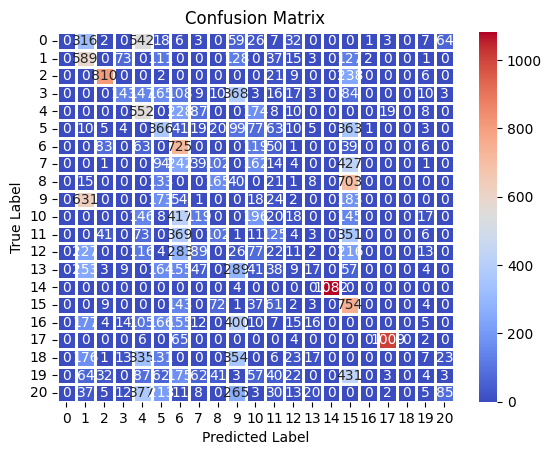

In [ ]:

k_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0
contador = 0

# Loop para encontrar o melhor valor de separação
for i in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    k_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

    contador = contador + 1

print(f"Melhor valor de k: {cv_final}")

# Ajustar valor de cv para algo razoável, como 5 ou 10
cv_scores = cross_val_score(classifier, x_transformed, y_transformed, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classifier, x_transformed, y_transformed, cv=cv_final))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Com Cross Val e UnderSample

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=24.
  warnings.warn(
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=25.
  warnings.warn(
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=26.
  warnings.warn(
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=27.
  warnings.warn(
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737:

3
Cross-Validation Scores: [0.64147287 0.71650485 0.72815534]
Mean Accuracy: 0.6953776874639371
Confusion Matrix:
[[  2   0   0   2   2   0   2   0   0   9   1   1   1   0   0   0   0   0
    3   0   0]
 [  0   0   0   0   0   0   0   0   0  22   0   0   0   1   0   0   0   0
    0   0   0]
 [  0   0  12   0   0   1   1   0   0   6   0   0   0   0   0   3   0   0
    0   0   0]
 [  1   0   0   3   3   0   1   0   0  14   0   0   0   0   0   0   0   0
    0   0   1]
 [  1   0   0   2   5   0   5   4   0   0   3   2   0   0   0   0   0   0
    0   1   0]
 [  0   0   0   0   0   0   1   0   0  19   1   0   0   0   0   0   0   0
    0   1   1]
 [  0   0   2   0   3   0  11   0   0   3   1   0   0   0   0   1   0   0
    0   2   0]
 [  0   0   0   0   2   0   7   2   0   8   1   0   0   0   0   0   0   0
    0   1   2]
 [  0   0   0   0   0   0   0   0   0  23   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   3   0   4   0  15  50   3   0 981  12   5   0   1   0   0   0   0
    0   4  

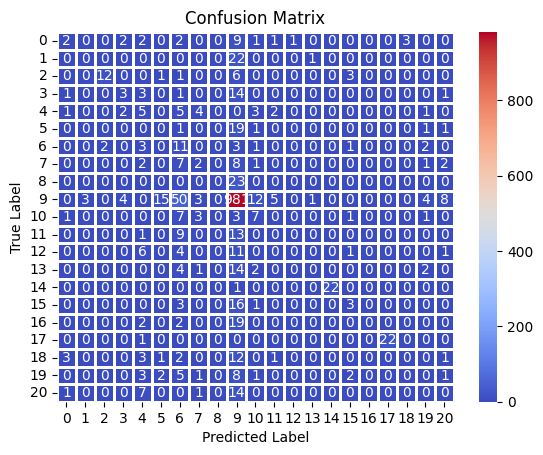

In [16]:
k_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

for contador in range(50):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, X_undersampled, y_undersampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    k_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k
print(cv_final)

cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, X_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Sem CrossVal com UnderSample

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         6
           2       1.00      0.25      0.40         8
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.10      0.50      0.17         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         6
           9       0.84      0.92      0.88       277
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         8
          14       1.00      1.00      1.00         5
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         5
          17       1.00    

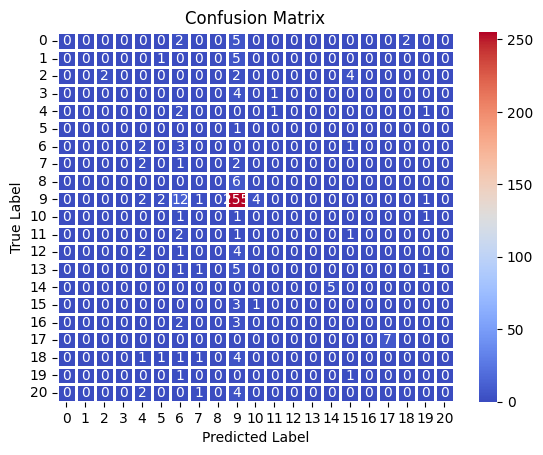

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X_undersampled, y_undersampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Sem CrossVal com OverSample

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         6
           2       1.00      0.25      0.40         8
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.10      0.50      0.17         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         6
           9       0.84      0.92      0.88       277
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         8
          14       1.00      1.00      1.00         5
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         5
          17       1.00    

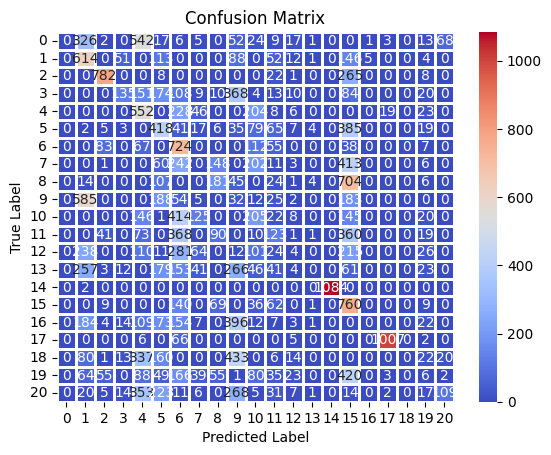

In [18]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classifier, x_transformed, y_transformed, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### PCA com atributos para Naive Bayes

In [19]:
pca = PCA(n_components=5)
pca.fit(x_enconded)

PCA(n_components=5)

In [20]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.83981351e-01 1.48725149e-02 1.14036129e-03 3.61358387e-06
 2.13801886e-06]
[56812.86542482  6984.66316749  1934.08026697   108.87353641
    83.7450269 ]


#### Treinando modelo com as alterações do PCA e UnderSample

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         6
           2       1.00      0.62      0.77         8
           3       0.00      0.00      0.00         5
           4       0.17      0.50      0.25         4
           5       0.00      0.00      0.00         1
           6       0.11      0.33      0.16         6
           7       0.00      0.00      0.00         5
           8       1.00      0.33      0.50         6
           9       0.83      0.93      0.88       277
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         8
          14       1.00      0.60      0.75         5
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         5
          17       1.00    

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

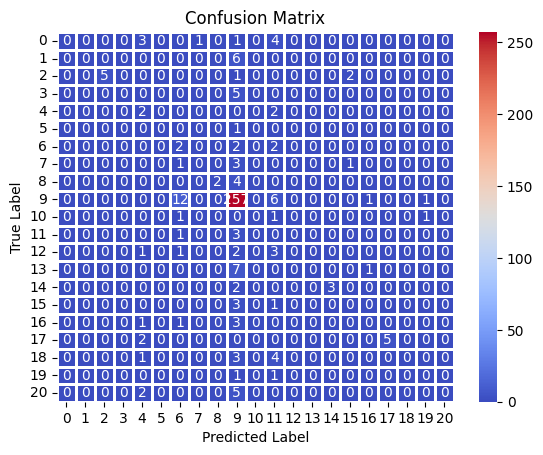

In [ ]:
reduced_x = pca.transform(x_enconded)

rus = RandomUnderSampler(random_state=0, sampling_strategy = 'not majority')

x_undersampled, y_undersampled = rus.fit_resample(reduced_x, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_undersampled, y_undersampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Treinando modelo com as alterações do PCA, UnderSample e CrossVal

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=24.
  warnings.warn(
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=25.
  warnings.warn(
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=26.
  warnings.warn(
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=27.
  warnings.warn(
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737:

42


C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=42.
  warnings.warn(


Cross-Validation Scores: [0.72972973 0.75675676 0.75675676 0.43243243 0.75675676 0.75675676
 0.7027027  0.7027027  0.75675676 0.7027027  0.56756757 0.62162162
 0.72972973 0.18918919 0.72972973 0.72972973 0.59459459 0.72972973
 0.7027027  0.75675676 0.72972973 0.7027027  0.75675676 0.75675676
 0.48648649 0.78378378 0.72972973 0.72972973 0.7027027  0.75675676
 0.75675676 0.7027027  0.72972973 0.72972973 0.41666667 0.72222222
 0.69444444 0.66666667 0.72222222 0.69444444 0.77777778 0.69444444]
Mean Accuracy: 0.6868654368654368
Confusion Matrix:
[[  2   0   0   0  11   0   0   0   0   5   1   3   0   0   0   0   0   0
    1   0   0]
 [  0   0   0   0   0   0   0   0   0  21   0   0   0   2   0   0   0   0
    0   0   0]
 [  0   0  12   0   0   0   0   0   0   9   0   1   0   0   0   1   0   0
    0   0   0]
 [  0   0   0   0   3   0   1   0   0  18   1   0   0   0   0   0   0   0
    0   0   0]
 [  1   0   0   0   8   0   2   0   0   0   5   3   1   0   0   0   0   0
    1   0   2]
 [  0   

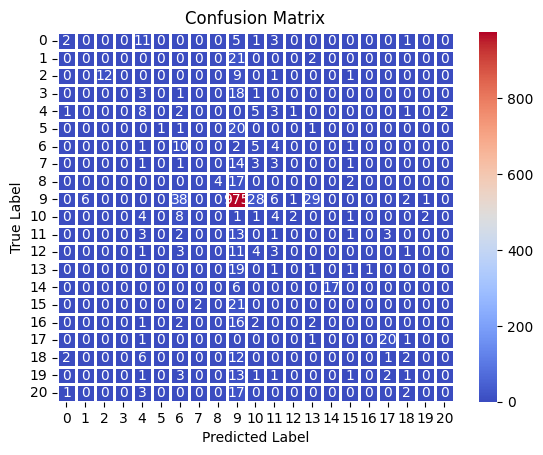

In [ ]:
reduced_x = pca.transform(x_enconded)

rus = RandomUnderSampler(random_state=0, sampling_strategy = 'not majority')

x_undersampled, y_undersampled = rus.fit_resample(reduced_x, y_encoded)

sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor valor de separação
for contador in range(50):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(cv_final)

# Executa a validação cruzada com a melhor separação
cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, X_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Acabei não colocando o Grid, pois descobri os melhores valores manualmente

#### <center> KNN

#### KNN com maior K

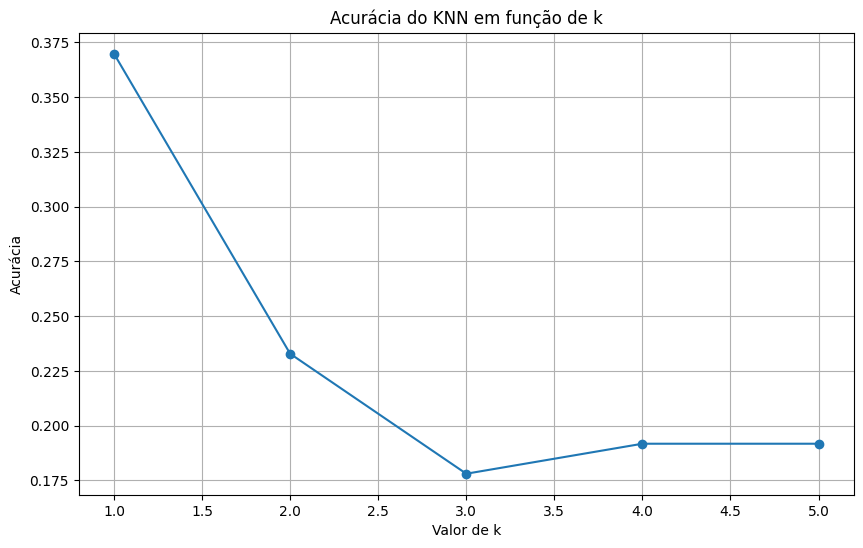

O melhor valor de k é: 0, com uma acurácia de: 1


In [ ]:
k_values = []
accuracies = []
maior_acuracia = 1
k_final = 0

# Checando a melhor acúracia em um range de 5
for contador in range(5):
    k = 1 + contador
    classificador_knn = KNeighborsClassifier(n_neighbors=k)
    classificador_knn.fit(x_treino, y_treino)

    previsao_knn = classificador_knn.predict(x_teste)
    acuracia = accuracy_score(y_teste, previsao_knn)

    k_values.append(k)
    accuracies.append(acuracia)

    if acuracia > maior_acuracia:
        maior_acuracia = acuracia
        k_final = k

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Acurácia do KNN em função de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()

print(f"O melhor valor de k é: {k_final}, com uma acurácia de: {maior_acuracia}")


#### Criando um classificador com o K de valor mais baixo

In [47]:
classificador_knn = KNeighborsClassifier(n_neighbors=k_final+1)

#### Treinando com CrossVal

Melhor k para Cross-Validation: 2
Cross-Validation Scores: [0.59511672 0.76737322]
Mean Accuracy: 0.6812449691440837
Confusion Matrix:
[[ 2  2  0  0  6  0  1  2  0  2  0  0  1  0  1  0  0  2  3  1  0]
 [ 3 11  0  0  0  2  0  0  0  1  0  0  0  2  2  1  1  0  0  0  0]
 [ 0  0 14  1  0  0  0  1  3  0  0  2  1  0  0  0  0  0  0  1  0]
 [ 0  1  0 13  1  0  0  2  1  1  0  0  1  0  0  0  1  1  1  0  0]
 [ 5  0  0  0  8  1  3  1  0  0  2  0  0  0  0  0  1  2  0  0  0]
 [ 0  2  0  4  1 11  1  0  1  1  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  4  0  8  2  1  1  4  0  2  0  0  0  0  0  0  0  0]
 [ 1  0  1  4  0  0  3  6  6  0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  3  3  0  1  0  7  8  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 5  4  0  1  0  2  2  0  1  7  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  1  2  0  7  2  0  0  6  0  1  0  0  0  0  2  0  1  0]
 [ 2  0  3  0  1  5  2  1  1  0  3  1  2  0  0  0  0  2  0  0  0]
 [ 0  0  3  1  1  0  5  2  0  1  1  3  2  1  1  0  1  0  1  0  0]
 [ 0  5

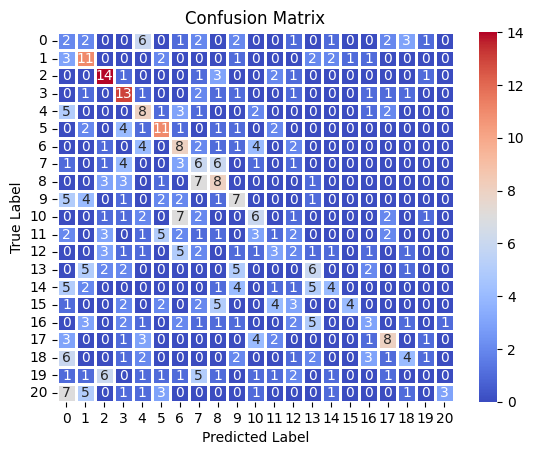

In [ ]:
sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor número de separações para o Cross-Validation
for contador in range(10):
    k = 2 + contador
    # Instanciar o classificador com n_neighbors igual a k
    classificador_knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(classificador_knn, x_enconded, y_encoded, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print("Melhor k para Cross-Validation:", cv_final)

# Reavaliação com o melhor K
classificador_knn = KNeighborsClassifier(n_neighbors=cv_final)
cv_scores = cross_val_score(classificador_knn, x_enconded, y_encoded, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classificador_knn, x_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Testando sem CrossVal

In [26]:
acuracia = accuracy_score( y_teste, previsao_knn)

print(acuracia)

matriz = confusion_matrix(y_teste, previsao_knn)
print(matriz)

0.7338501291989664
[[  1   0   0   0   3   0   0   0   0   1   0   1   0   0   0   0   0   2
    1   0   0]
 [  0   1   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   2   0   0   0   0   0   0   2   0   2   0   0   0   0   0   0
    0   2   0]
 [  0   0   0   1   0   1   0   0   0   2   0   0   0   0   0   1   0   0
    0   0   0]
 [  2   0   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   1   0   1   1   1   1   0   0   1   0   0   0   0   0
    0   0   0]
 [  0   0   1   0   0   2   0   0   1   1   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   1   0   0   1   3   0   0   0   0   0   0   0   0
    0   1   0]
 [  0   0   2   0   1   0   0   0   0 272   0   1   1   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   1   0   0   0   0   2   0   0   0   0   0   0   0   0
    0   0   0]
 [

#### Tentando aumentar a acurácia com UnderSample

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.10      1.00      0.18         1
           2       0.33      1.00      0.50         1
           3       0.33      1.00      0.50         3
           4       0.33      0.75      0.46         4
           5       0.25      0.25      0.25         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.33      0.25      0.29         4
           9       0.25      0.33      0.29         3
          10       0.50      0.17      0.25         6
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       0.25      0.12      0.17         8
          14       1.00      0.25      0.40         4
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         2
          17       0.50    

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

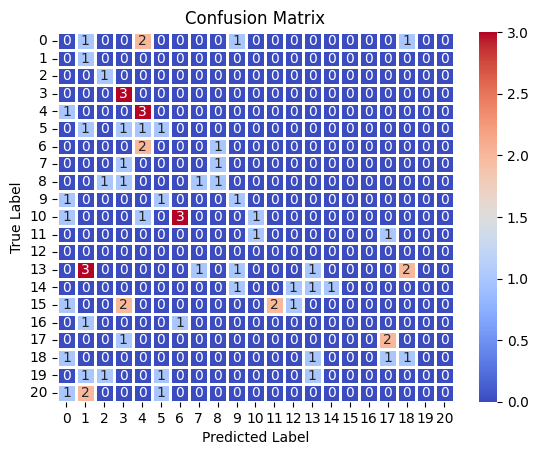

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X_undersampled, y_undersampled, test_size=0.15, random_state=0)

treinandoKNN = classificador_knn.fit(x_treino, y_treino)

previsao = classificador_knn.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Tentando aumentar com OverSample e CrossVal

11
Cross-Validation Scores: [0.82497589 0.79363549 0.80617165 0.81090207 0.82103232 0.81813796
 0.82199711 0.82151471 0.80800772 0.81669079 0.80704293]
Mean Accuracy: 0.813646240274176
Confusion Matrix:
[[ 926    7    1    5   23    8    5    2    2    4    6    7    6    2
    34    0    1    9   24    8    6]
 [  14  994    0    7    0    6    0    0    8    6    0    0   21    5
     8    3    2    0    3    2    7]
 [   3    0 1070    0    0    1    5    0    0    0    0    6    0    0
     0    0    0    0    1    0    0]
 [   8   10    3  936   10   14    2    3   14    3   17   23    4    4
     0   19    3    2    2    6    3]
 [  26    0    0   24  866    1   38    6    0    0   14   20   17    0
     0    0    7   36   19    9    3]
 [   5   14    3   20    2  996    0    1   10    5    2    2    3   12
     0    1    1    0    2    4    3]
 [   6    0   17    4   83    0  864   13    2    8   21   41   13    1
     0    0    0    0    0   13    0]
 [   0    0    0    1   22 

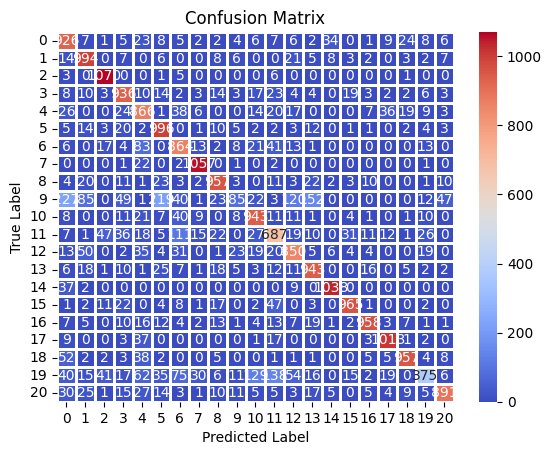

In [ ]:
sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor separação de CrossVal
for contador in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classificador_knn, x_transformed, y_transformed, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(cv_final)

cv_scores = cross_val_score(classificador_knn, x_transformed, y_transformed, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classificador_knn, x_transformed, y_transformed, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### <center> Gini </center>

#### Antes de modificar os Hyperparams

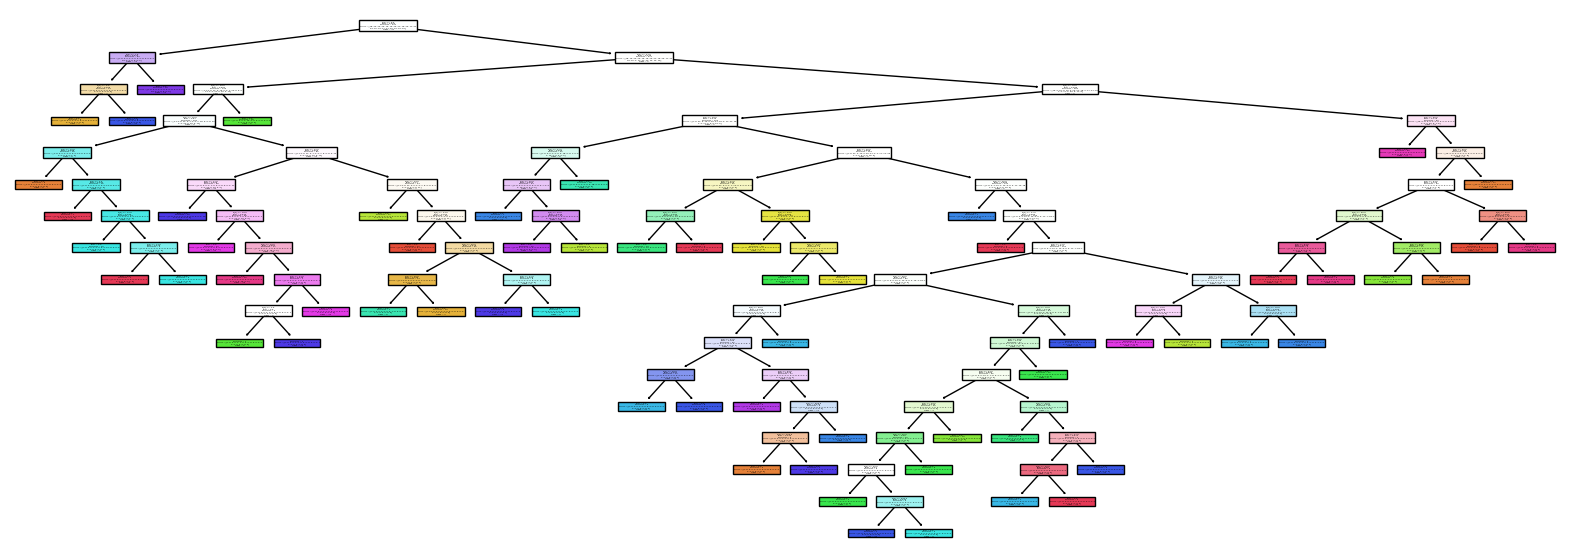

In [29]:
classificador_gini = tree.DecisionTreeClassifier(criterion='gini')
classificador_gini.fit(x_treino, y_treino)
plt.figure(figsize=(20,7))
tree.plot_tree(classificador_gini, class_names=classificador_gini.classes_.astype(str), filled=True)
plt.show()

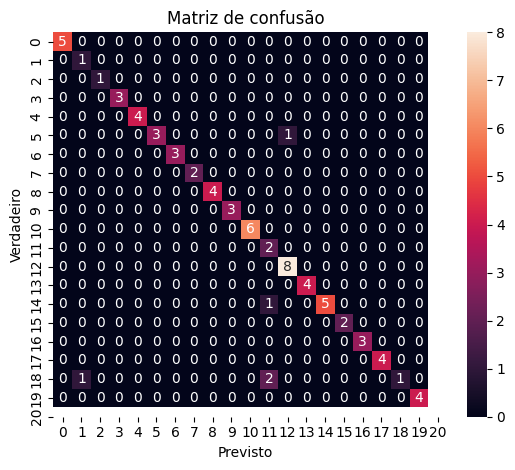

In [30]:
y_pred_gini = classificador_gini.predict(x_teste)

matriz_de_confusao = confusion_matrix(y_teste, y_pred_gini)

sns.heatmap(matriz_de_confusao, square=True, annot=True, fmt='d', cbar=True, yticklabels=classificador_gini.classes_, xticklabels=classificador_gini.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

In [31]:
#profundidade da árvore
print('Profundidade gini:', classificador_gini.tree_.max_depth)
#quantidade de nós da árvore
print('Quantidade de nós gini: ', classificador_gini.tree_.node_count)

Profundidade gini: 16
Quantidade de nós gini:  123


### <center> Entropia </center>

#### Antes de modificar os Hyperparams

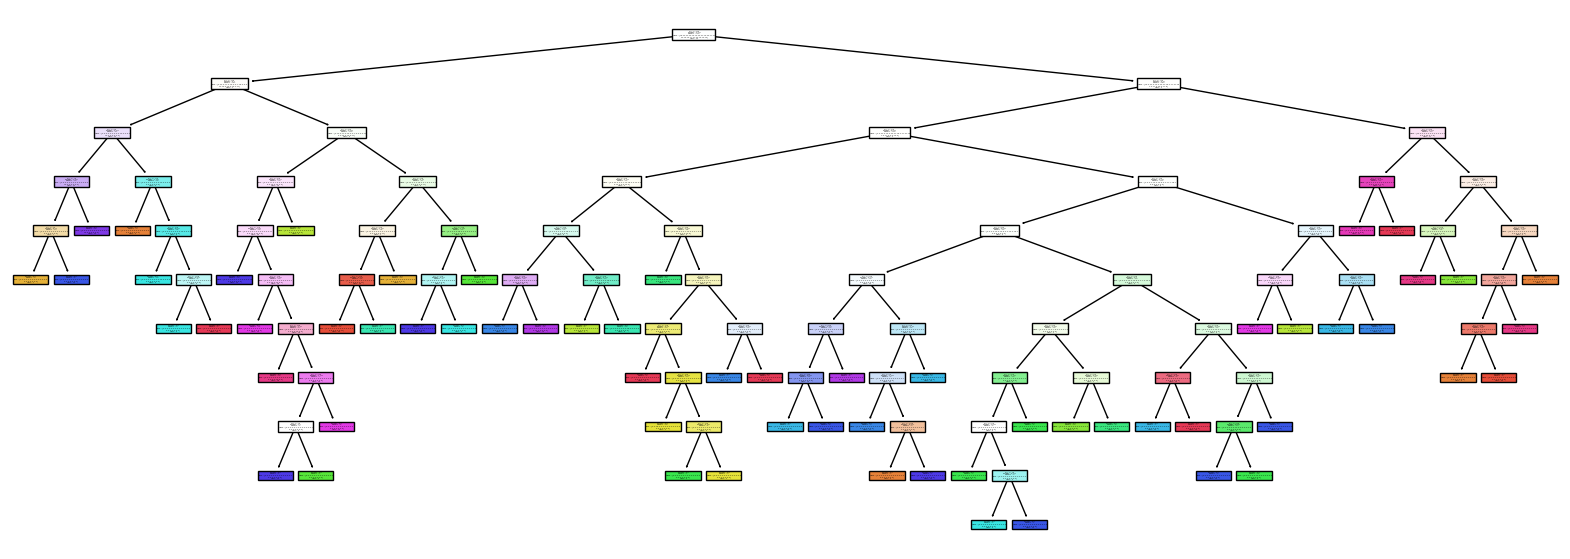

In [32]:
classificador_entropy = tree.DecisionTreeClassifier(criterion='entropy')
classificador_entropy.fit(x_treino, y_treino)
plt.figure(figsize=(20,7))
tree.plot_tree(classificador_entropy, class_names=classificador_entropy.classes_.astype(str), filled=True)
plt.show()

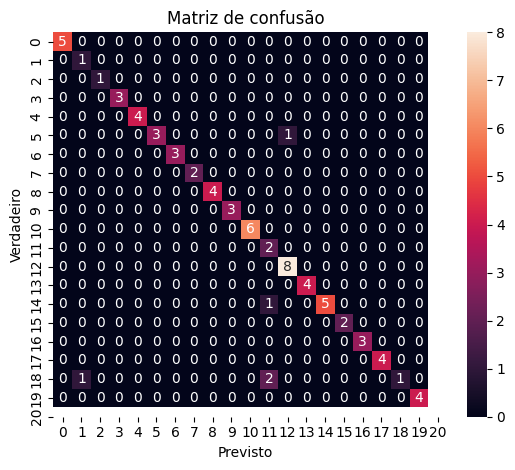

In [33]:
y_pred_entropy = classificador_entropy.predict(x_teste)

matriz_de_confusao_entropy = confusion_matrix(y_teste, y_pred_entropy)

sns.heatmap(matriz_de_confusao_entropy, square=True, annot=True, fmt='d', cbar=True, 
            yticklabels=classificador_entropy.classes_, 
            xticklabels=classificador_entropy.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

In [34]:
#profundidade da árvore
print('Profundidade entropy:', classificador_entropy.tree_.max_depth)
#quantidade de nós da árvore
print('Quantidade de nós entropy: ', classificador_entropy.tree_.node_count)

Profundidade entropy: 10
Quantidade de nós entropy:  121


In [35]:
previsao_entropy = classificador_entropy.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_entropy)
print('Acurácia: ', acuracia)

report = classification_report(y_teste, previsao_entropy)
print(report)

Acurácia:  0.9315068493150684
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       0.40      1.00      0.57         2
          13       0.89      1.00      0.94         8
          14       1.00      1.00      1.00         4
          15       1.00      0.83      0.91         6
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00        

#### <center> Depois de modificar os Hyperparams </center>

In [36]:
parametros = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,12],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,5,10],
    'max_features': [None, 'sqrt', 'log2']
}

classificador_tree_gini = tree.DecisionTreeClassifier()

#criando o objeto
grid = GridSearchCV(estimator=classificador_tree_gini, param_grid=parametros, scoring='accuracy')
grid.fit(x_treino, y_treino)
print('Melhores hiperparametros: ', grid.best_params_)

Melhores hiperparametros:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [37]:
melhor_classificador = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=10,
    min_samples_split=2,
    splitter='best'
)

melhor_classificador.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)

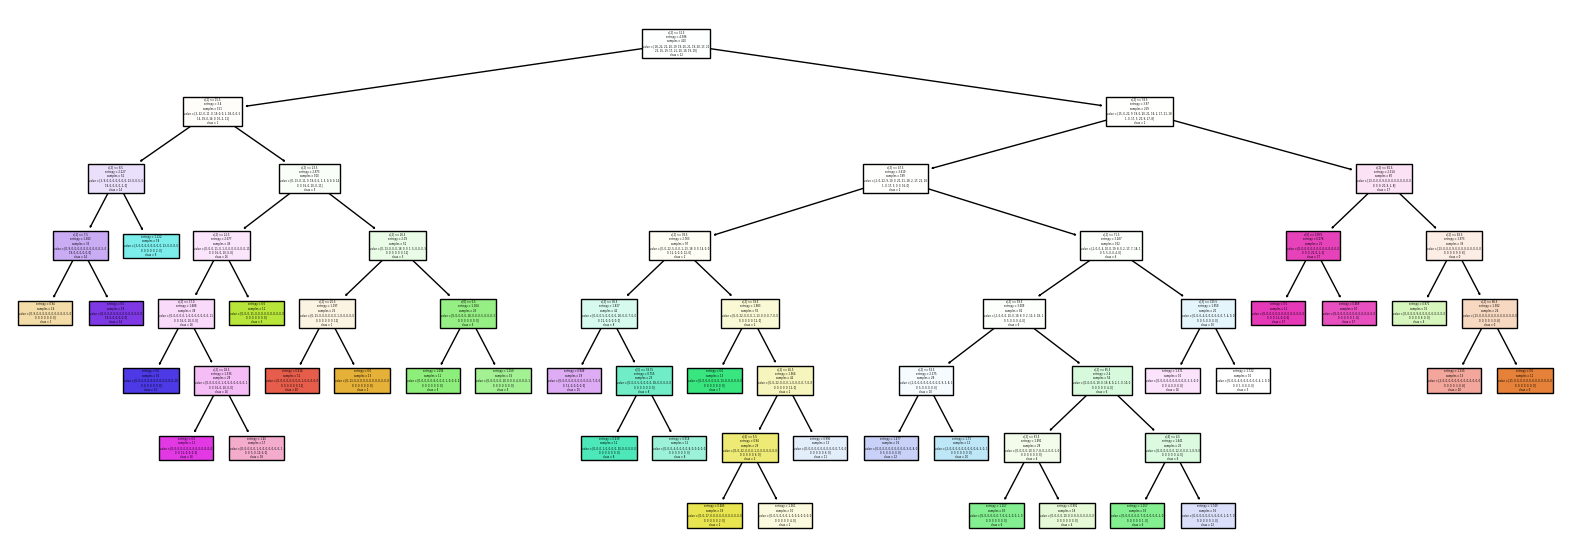

In [38]:
#Plotando a árvore depois de modificar os Hyperparams
plt.figure(figsize=(20,7))
tree.plot_tree(melhor_classificador, class_names=melhor_classificador.classes_.astype(str), filled=True)
plt.show()

In [39]:
#profundidade da árvore
print('Profundidade gini:', melhor_classificador.tree_.max_depth)
#quantidade de nós da árvore
print('Quantidade de nós gini: ', melhor_classificador.tree_.node_count)

Profundidade gini: 7
Quantidade de nós gini:  61


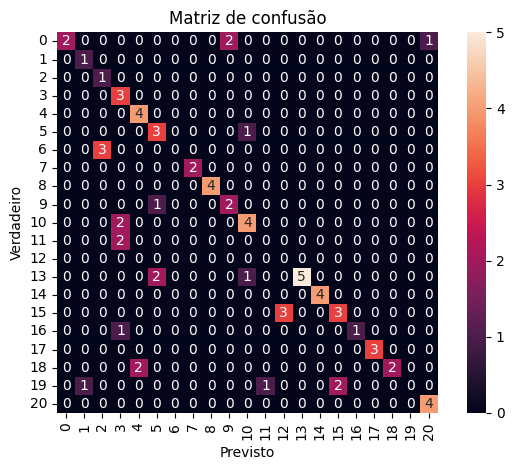

In [40]:
#Nova matriz de confusão
y_pred = melhor_classificador.predict(x_teste)

matriz_de_confusao_gini = confusion_matrix(y_teste, y_pred)

sns.heatmap(matriz_de_confusao_gini, square=True, annot=True, fmt='d', cbar=True, yticklabels=melhor_classificador.classes_, xticklabels=classificador_gini.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

In [41]:
previsao_gini = melhor_classificador.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_gini)
print('Acurácia: ', acuracia)

report = classification_report(y_teste, previsao_gini)
print(report)

Acurácia:  0.6575342465753424
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.50      1.00      0.67         1
           2       0.25      1.00      0.40         1
           3       0.38      1.00      0.55         3
           4       0.67      1.00      0.80         4
           5       0.50      0.75      0.60         4
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       0.50      0.67      0.57         3
          10       0.67      0.67      0.67         6
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       1.00      0.62      0.77         8
          14       1.00      1.00      1.00         4
          15       0.60      0.50      0.55         6
          16       1.00      0.50      0.67        

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

In [42]:
predict_teste = classificador_gini.predict(x_treino)
print("Classificação:",predict_teste)
acuracia_teste = accuracy_score(y_treino, predict_teste)
print(acuracia_teste)

Classificação: [10 10 13 20  2  7  2  8  3 18  0  3 17 10 12  0 15  0 18 18  4 20  8 16
 11 10  8  9 12  2 12 16 19 16 20  2 10  1  6  2  7  7 17  8  6  9 17 19
 19 17  6  6  2 13  2  3  1 12  0 12  0 10  5 17  5  0  2  0 12  0 13 15
  2  6 14  3 15 14  6 19 19 20 15 20 12 11  2  8 14 17  4 13  2 19 18 18
 10  3 15  4 13 13 11  4  0  6  6  6 12 20 10  9 17  2 13 10  6  4 17  0
 17  0  6 13 11  1  4  9  4 11 13  7  9  5  7 17  5 10  4 15 12 12  5  8
 14 11  5 18  9 17 15 14  5  1 20  7  1  1  4  3  2  7  8  7 13 14 20 17
 14  4 16  9  2 18 11 18  3  5 20  1 16  1  7 15 14 18  9  1 20 12  6 17
 16  6  9  4 14 18 14  9 16  8  9  8 10 11  2  1  9  9  5  4  7 19 16  1
 11 15  3 16 19  0 12 17 20  9  7  3 20 19  4  6  6  0 14  4 16  6 10 11
 15 16 10 16  0 12 11  9 16  0 19  5 12 12  3  8 15 20 11 12 19  7 18  3
 13 11  0 15  3 11  1 20  2  1 11  2  9 17 16 17  5  9  2 15  5  8  1  1
  0  8 17  4 15 13 20  7 16 11  4 19  4 18  7  3 13  2 14 16  9 12  9  6
  6 14  7 15  5 18 20 11 14  8  3  5

In [43]:
# Avaliar usando cross-validation2
x_resampled, y_resampled = rus.fit_resample(reduced_x, y_encoded)
scores = cross_val_score(melhor_classificador, x_enconded, y_encoded, cv=5, scoring='accuracy')

# Resultados
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.99396378 0.98457411 0.99597586 0.99396378 0.99597315]
Accuracy: 0.99 (+/- 0.01)


In [44]:
# Salvar o preprocessador em um arquivo
with open('preprocessador.pkl', 'wb') as f:
    pickle.dump(preprocessador, f)

# Salvar o label_encoder em outro arquivo
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [45]:
with open('melhor_modelo.pkl', mode='wb') as f:
    pickle.dump(melhor_classificador, f)